### Project and data are based on a free, online course of machine learning https://www.coursera.org/learn/machine-learning. I wholeheartedly recommend this! 

## I will show how do it in Python:
    + logistic regression,
    + plot decision boundary,
    + meaning of data overfitting and underfitting,
    + cost function with regularization for logistic regression. 

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy.optimize import minimize
import warnings
import sys

# ignore warnings
warnings.filterwarnings('ignore')

# write packages and python version to file
'''
! python -m pip list > packages_versions.txt
# a append to file
with open('packages_versions.txt', 'a') as f:
    f.write('Python version ' + str(sys.version))
''';

In [2]:
from numpy import exp, log

def cat_ones(X):
    '''
    Inserts column of 1s to data X.
    '''
    m = len(X)
    ones = np.ones((m,1))
    return np.concatenate((ones, X),axis = 1)

def sigmoid(z):
    '''
    Returns value of sigmoid.
    '''
    return 1/(1 + exp(-z))

def cost_function_reg(theta, X, Y, lambda_ = 0):
    '''
    Returns cost function, default without regulazation.
    '''
    n = len(theta)
    m = len(X)
    theta = np.array(theta).reshape(n,1)
    temp = sigmoid(X @ theta)
    J =  np.sum(-Y*log(temp) - (1 - Y)*log(1 - temp))/m + np.sum(lambda_/(2*m) * theta[1:]**2)
    return J

def jac_reg(theta, X, Y, lambda_ = 0):
    '''
    Returns gradient of cost function, default without regulazation.
    '''
    m = len(X)
    n = len(theta)
    theta = np.array(theta).reshape(n,1)
    temp = sigmoid(X @ theta)
    grad = (X.T @ (temp - Y)/m).reshape(n)
    
    reg = (lambda_ * theta / m).reshape(n)
    reg[0] = 0
    return grad + reg

    
def map_feature(x0, x1, degree):
    '''
    Extends [x0, x1] to [1, x0, x1, x0**2, x0*x1, x1**2, ..., x0**degree, x0**(degree-1)*x1, x1**degree].
    '''
    t = [1]
    for i in range(1, degree + 1):
        for j in range(i + 1):
            t.append(x0**(i-j) * x1**j)
    t = np.array(t)
    return t

def decision_boundary(theta, X_ones, degree):
    ''' 
    Computes 3D implicit function f on the grid.
    solution f = 0 gives decision boundary. It is equivalent to sigmoid(f) = 0.5.
    '''
    x0_min, x1_min = np.min(X_ones, axis = 0)
    x0_max, x1_max = np.max(X_ones, axis = 0)  
    size = 600
    u = np.linspace(x0_min, x0_max, size)
    v = np.linspace(x1_min, x1_max, size)
    Z = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            Z[i][j] = theta @ map_feature(u[i], v[j], degree)
    Z = Z.T
    U,V = np.meshgrid(u, v)
    return U, V, Z

def predict(X, theta) -> int:
    '''
    Return prediction value 1 or 0.
    '''
    return sigmoid(X @ theta) >= 0.5

def plot_boundary(lambda_,title, X_map, Y, degree):
    '''
    Plots decision boundary and prints accuracy at training set.
    '''
    theta = np.ones((X_map.shape[1],1))
    res = minimize(cost_function_reg, theta, args = (X_map,Y,lambda_), jac = jac_reg)
    theta_min = res.x
    U, V ,Z = decision_boundary(theta_min, X, degree)
    
    #Create axis
    ax = plot_2types(X[:,0], X[:,1], Y, 'valid', 'invalid', 'Microchip test 1', 'Microchip test 2')
    #Plot Z = 0
    ax.contour(U, V, Z,[0],  cmap='summer')
    ax.set_title(title, size = 15)
    accuracy = np.mean(predict(X_map , theta_min) == Y.T) * 100
    print("Accuracy at training set: ", round(accuracy,2), '%')
    
def plot_2types(X1, X2, Y, l1, l2, lab1, lab2):
    '''
    Distinguishs two types of data by lab1 and lab2 and plot it.
    '''
    X1_neg, X2_neg = [], []
    X1_pos, X2_pos = [], []
    for x1, x2, y in zip(X1, X2, Y):
        if y == 1:
            X1_pos.append(x1)
            X2_pos.append(x2)
        else:
            X1_neg.append(x1)
            X2_neg.append(x2)
            
    fig = plt.figure(figsize=(10,10)) 
    ax = fig.gca() # get current axis
    ax.scatter(X1_pos,X2_pos, color = 'r', label = l1)
    ax.scatter(X1_neg,X2_neg, color = 'b', label = l2)
    ax.set_xlabel(lab1, fontsize=18)
    ax.set_ylabel(lab2, fontsize=18)
    ax.legend(prop={'size': 20})
    return ax

In [3]:
# load needed data
data1 = pd.read_csv('ex2data1.txt', header = None)
X = data1.iloc[:,:2].values
Y = data1[2][:].values[np.newaxis].T

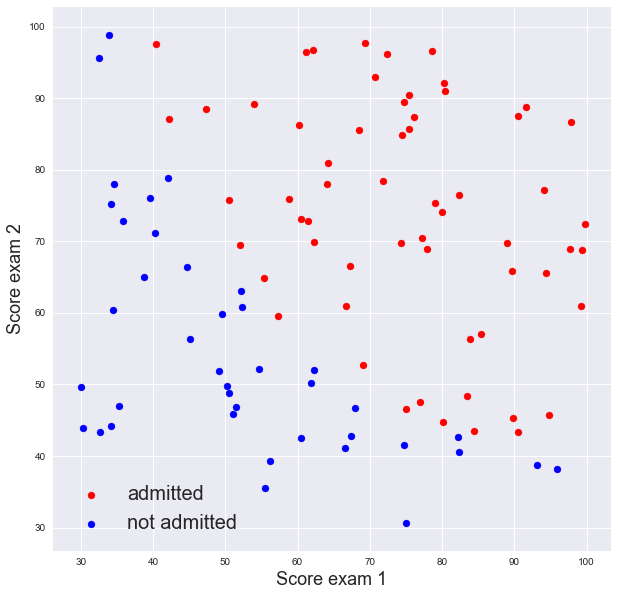

In [4]:
ax1 = plot_2types(X[:,0], X[:,1], Y, 'admitted', 'not admitted', 'Score exam 1', 'Score exam 2')

Accuracy at training set:  89.0 %


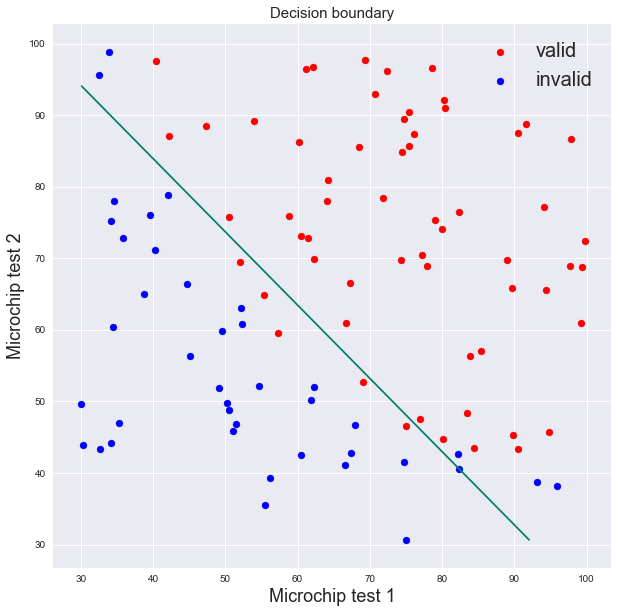

In [5]:
X_ones = cat_ones(X)
res = minimize(cost_function_reg, np.ones(3), args = (X_ones,Y), jac = jac_reg)
theta = res.x
lambda_ = 1
X_map =[]
for row in X:
    X_map.append(map_feature(row[0], row[1], degree = 1))
X_map = np.array(X_map)
plot_boundary(lambda_, 'Decision boundary', X_map, Y, degree = 1)

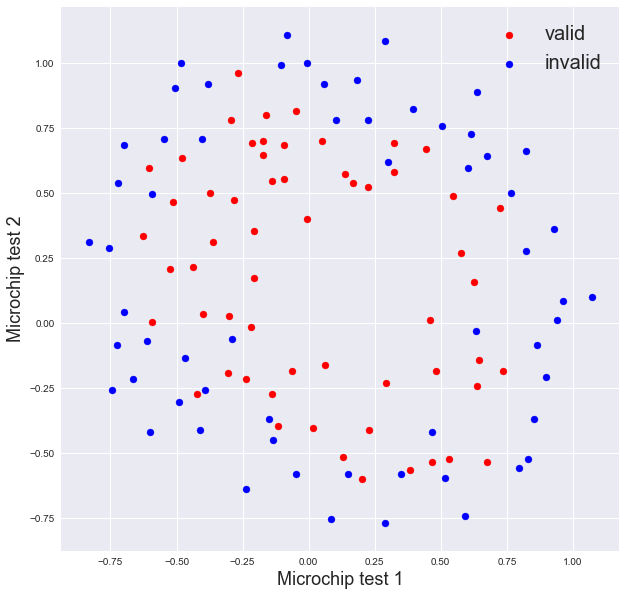

In [6]:
data2 = pd.read_csv('ex2data2.txt', header = None)
X = data2.iloc[:,:2].values
Y = data2[2][:].values[np.newaxis].T
ax2 = plot_2types(X[:,0], X[:,1], Y, 'valid', 'invalid', 'Microchip test 1', 'Microchip test 2')

Accuracy at training set:  87.29 %


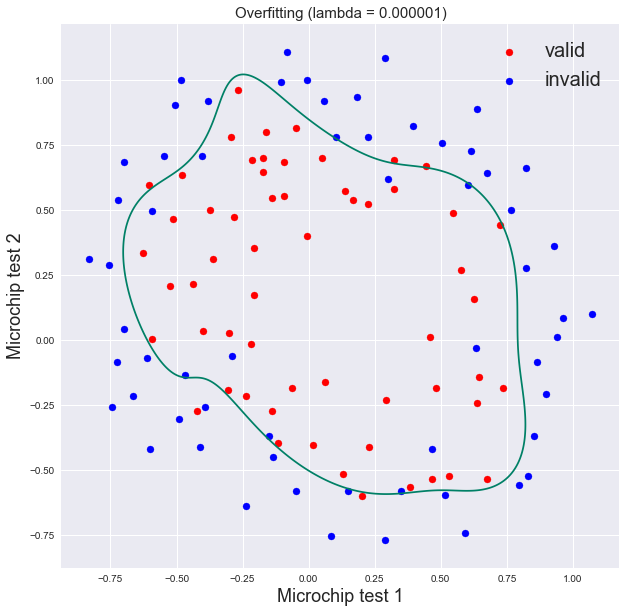

In [7]:
X_map =[]
# Try change deg (degree of polynomial)
deg = 6
for row in X:
    X_map.append(map_feature(row[0], row[1], degree = deg))
X_map = np.array(X_map)


lambda_ = 0.000001
plot_boundary(lambda_, 'Overfitting (lambda = 0.000001)', X_map, Y, degree = deg)



Accuracy at training set:  83.05 %


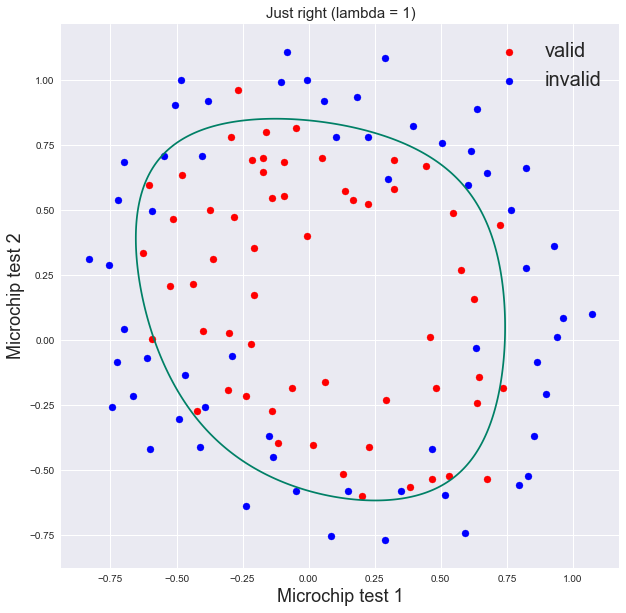

In [8]:
lambda_ = 1
plot_boundary(lambda_, 'Just right (lambda = 1)', X_map, Y, degree = deg)


Accuracy at training set:  61.02 %


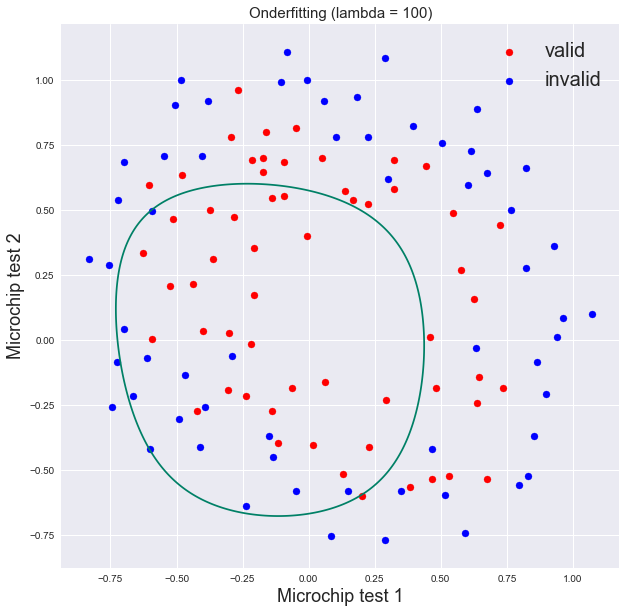

In [9]:
lambda_ = 100
plot_boundary(lambda_, 'Onderfitting (lambda = 100)', X_map, Y, degree = deg)